In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../scripts/')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from data_cleaner import DataCleaner
from data_visualizer import DataVisualizer
%matplotlib inline

In [4]:
root_dir = Path().cwd().parent
data_dir = root_dir / "data"

In [5]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (20, 10)

In [6]:
df = pd.read_csv(data_dir / "data.csv")

In [7]:
df.drop(columns="Unnamed: 32", axis=1, inplace=True)

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.shape

(569, 32)

In [10]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,911296202,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.040,31.37,251.20,4254.0,0.1357,0.42560,0.68330,0.26250,0.2641,0.07427
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
111,86408,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,...,13.330,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
146,869691,M,11.800,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,...,13.740,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300


In [11]:
df_copy = df.copy()

In [12]:
data_cleaner = DataCleaner()

## Check Missing Values

In [13]:
data_cleaner.missing_percentage(df_copy)

,column_name,percent_missing
0,id,0.0
1,diagnosis,0.0
2,radius_mean,0.0
3,texture_mean,0.0
4,perimeter_mean,0.0
5,area_mean,0.0
6,smoothness_mean,0.0
7,compactness_mean,0.0
8,concavity_mean,0.0
9,concave points_mean,0.0


## Check Duplicates

In [14]:
data_cleaner.check_number_of_duplicates(df_copy)

0

## Treating Outliers

<AxesSubplot:xlabel='radius_mean'>

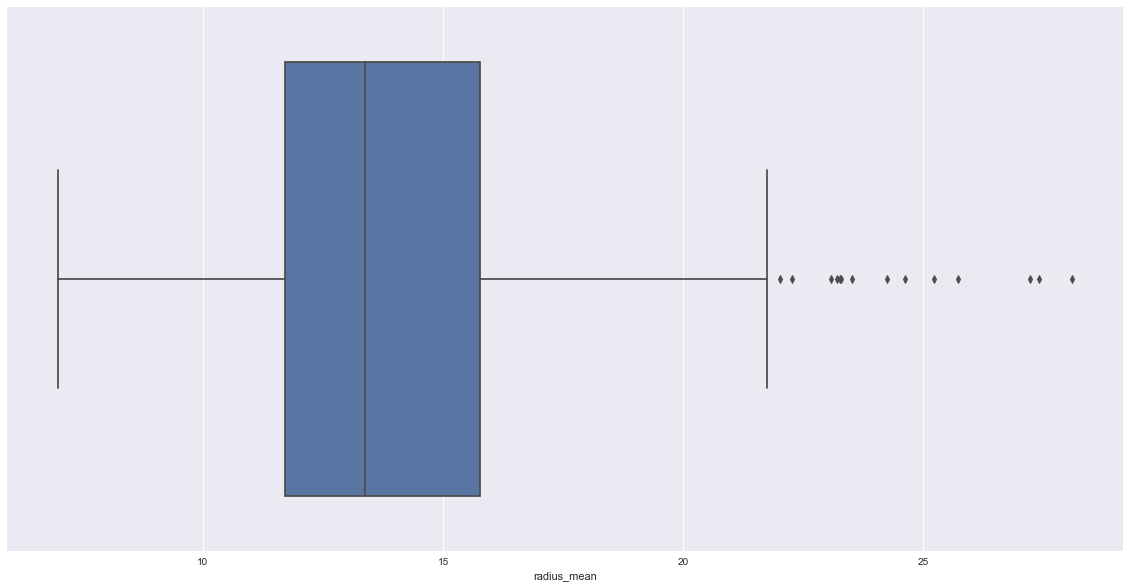

In [15]:
sns.boxplot(x=df_copy["radius_mean"])

In [16]:
outlier_treated_df = data_cleaner.remove_outliers(df_copy.iloc[:, 2:])

<AxesSubplot:xlabel='radius_mean'>

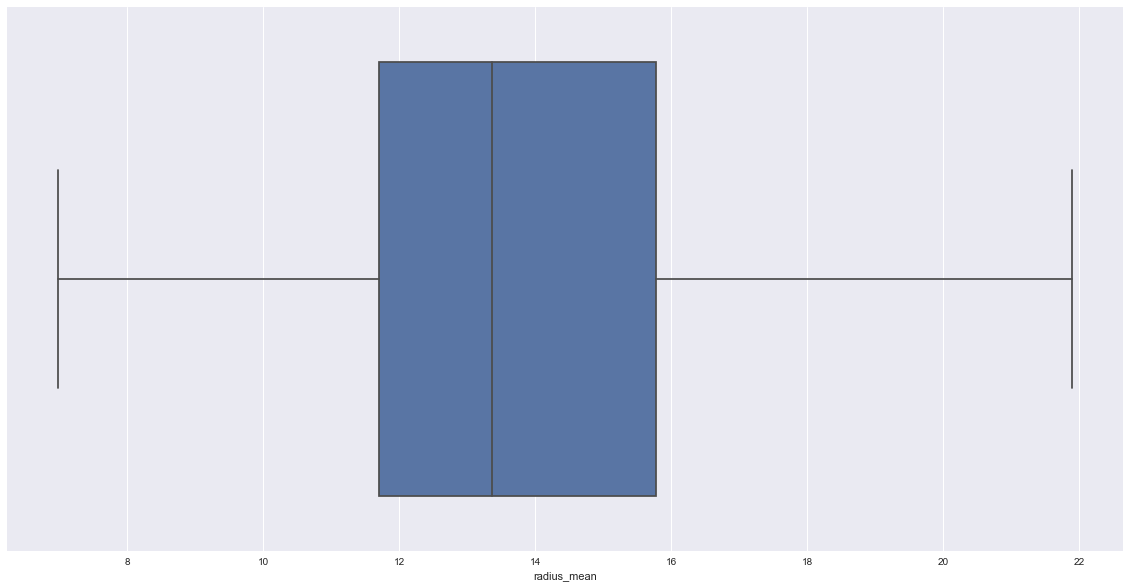

In [17]:
sns.boxplot(x=outlier_treated_df["radius_mean"])

In [18]:
clean_df = pd.concat([df_copy.iloc[:, :2], outlier_treated_df], axis=1)

In [27]:
clean_df["id"] = clean_df["id"].astype(object)

In [28]:
clean_df.to_csv(data_dir / "data_clean.csv", index=False)

In [29]:
data_visualizer = DataVisualizer()

## Univariate Non-graphical Analysis

In [30]:
data_visualizer.summary_info(clean_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,object,Categorical,569,"[842302, 842517, 84300903, 84348301, 84358402,...",0,0.0
diagnosis,object,Categorical,2,"[M, B]",0,0.0
radius_mean,float64,Numerical,443,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",0,0.0
texture_mean,float64,Numerical,473,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...",0,0.0
perimeter_mean,float64,Numerical,511,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...",0,0.0
area_mean,float64,Numerical,515,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...",0,0.0
smoothness_mean,float64,Numerical,470,"[0.1184, 0.08474, 0.1096, 0.133695, 0.1003, 0....",0,0.0
compactness_mean,float64,Numerical,522,"[0.22861999999999996, 0.07864, 0.1599, 0.1328,...",0,0.0
concavity_mean,float64,Numerical,520,"[0.28241000000000005, 0.0869, 0.1974, 0.2414, ...",0,0.0
concave points_mean,float64,Numerical,533,"[0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08...",0,0.0


# Univariate Graphical Analysis

**1. Plot for radius_mean**

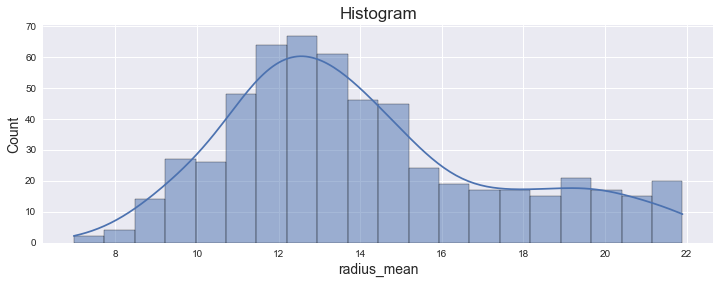

**2. Plot for texture_mean**

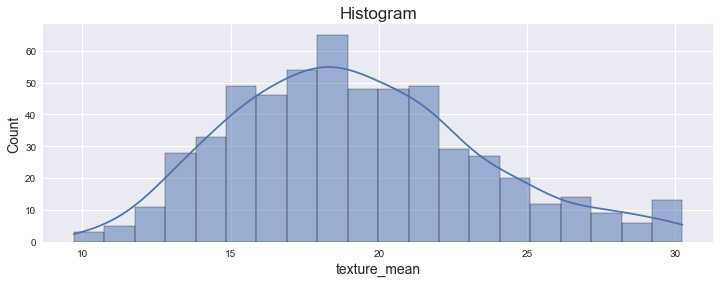

**3. Plot for perimeter_mean**

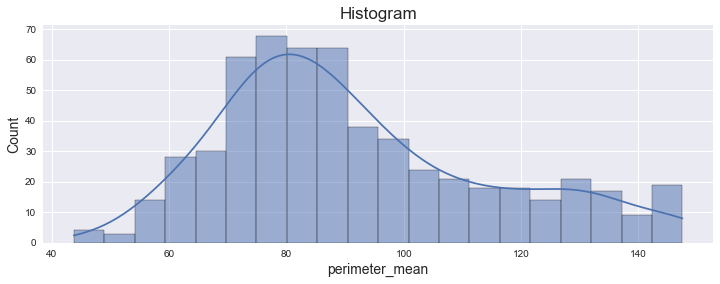

**4. Plot for area_mean**

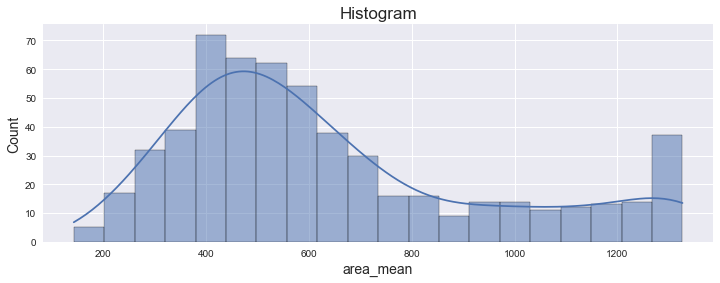

**5. Plot for smoothness_mean**

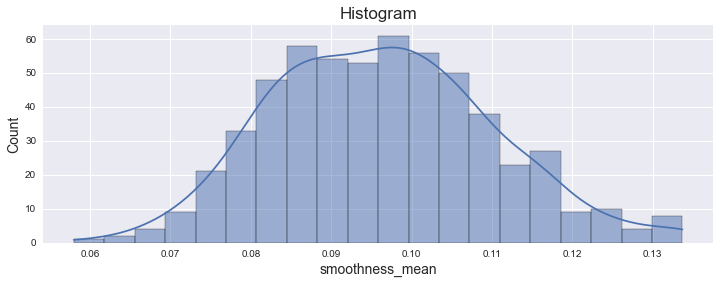

**6. Plot for compactness_mean**

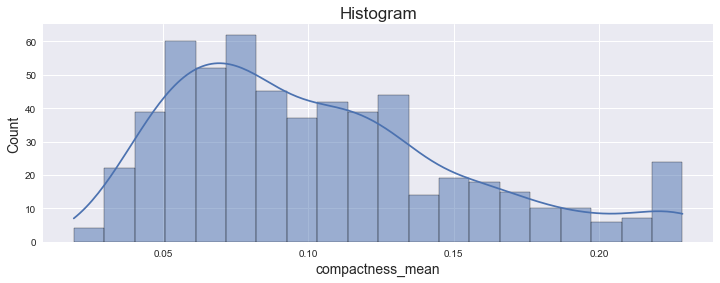

**7. Plot for concavity_mean**

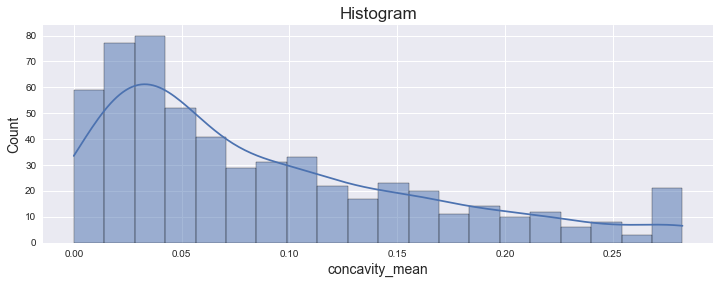

**8. Plot for concave points_mean**

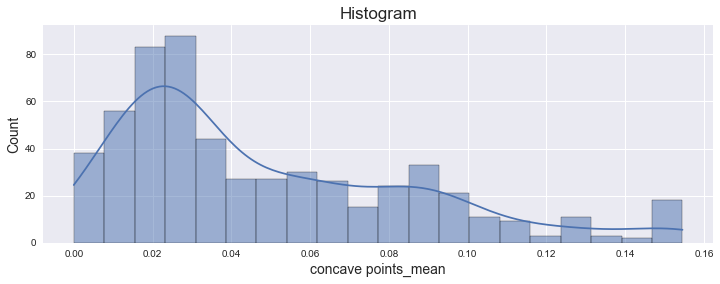

**9. Plot for symmetry_mean**

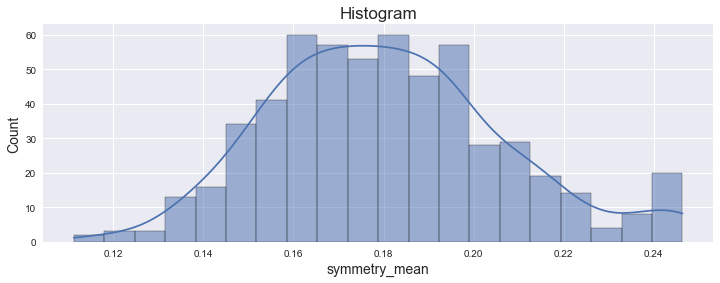

**10. Plot for fractal_dimension_mean**

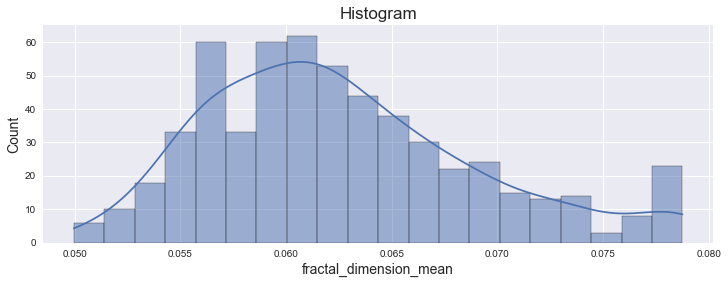

**11. Plot for radius_se**

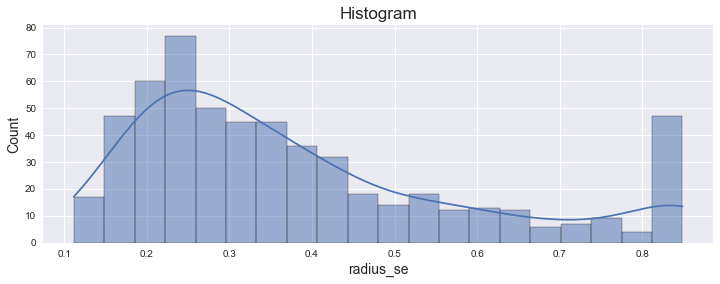

**12. Plot for texture_se**

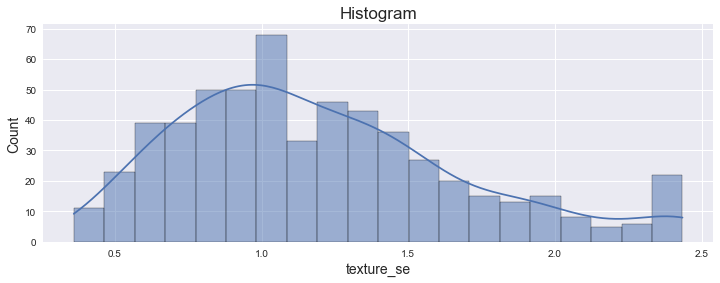

**13. Plot for perimeter_se**

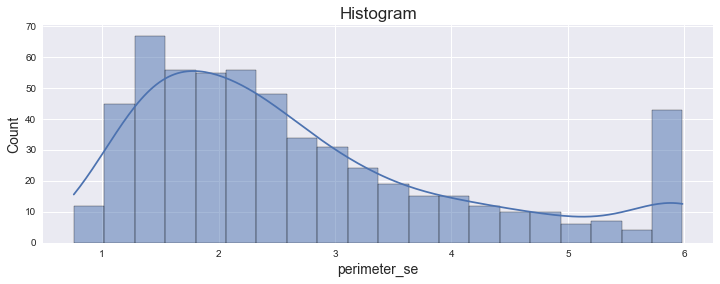

**14. Plot for area_se**

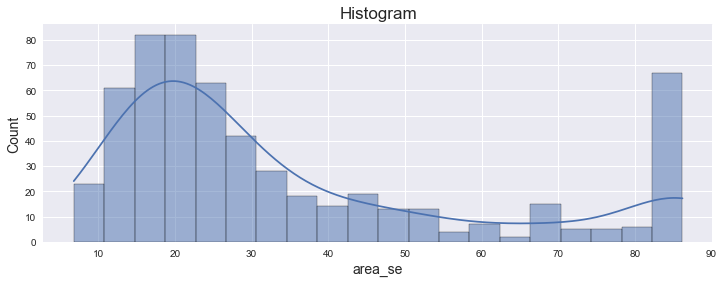

**15. Plot for smoothness_se**

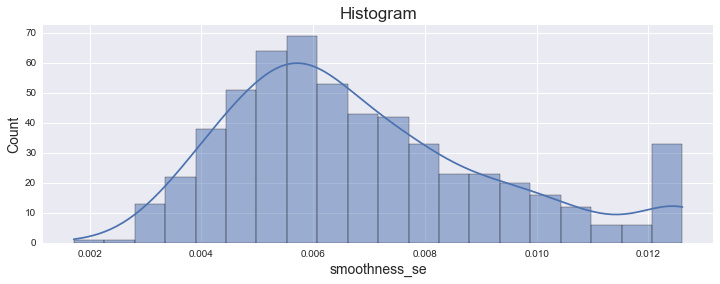

**16. Plot for compactness_se**

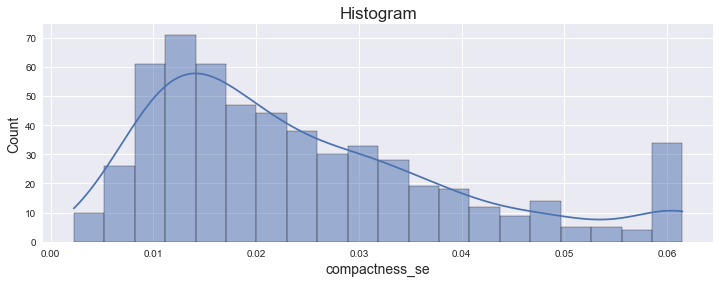

**17. Plot for concavity_se**

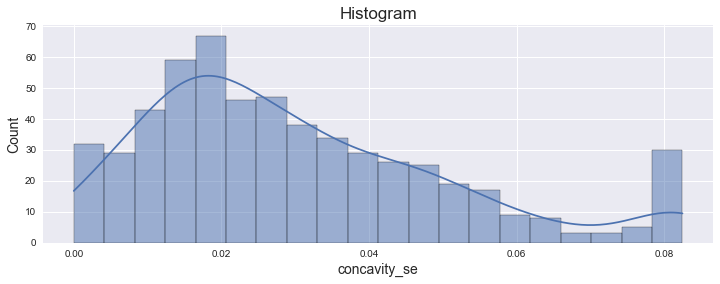

**18. Plot for concave points_se**

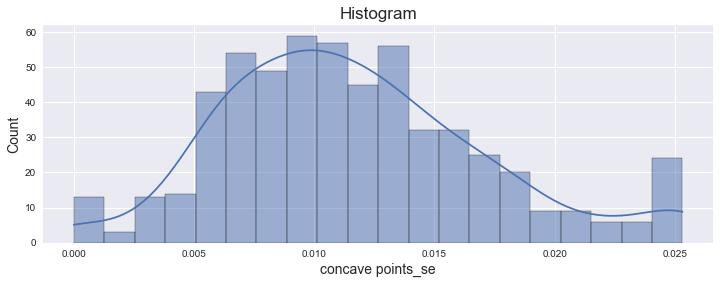

**19. Plot for symmetry_se**

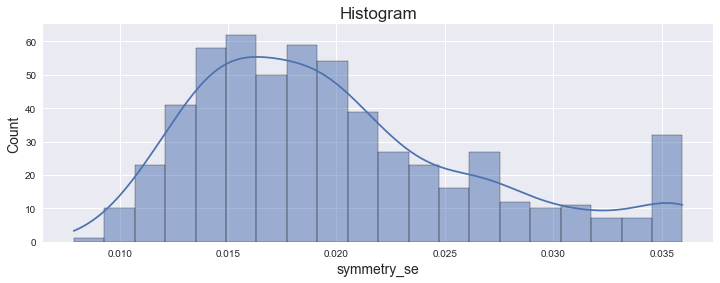

**20. Plot for fractal_dimension_se**

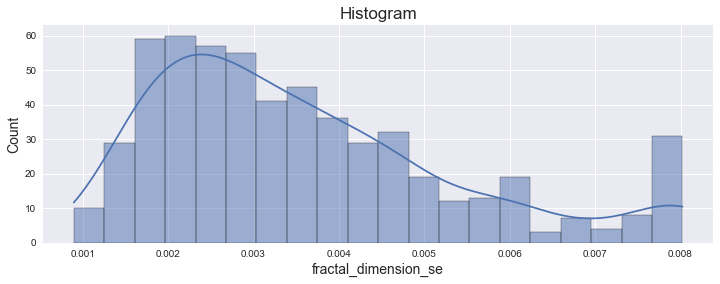

**21. Plot for radius_worst**

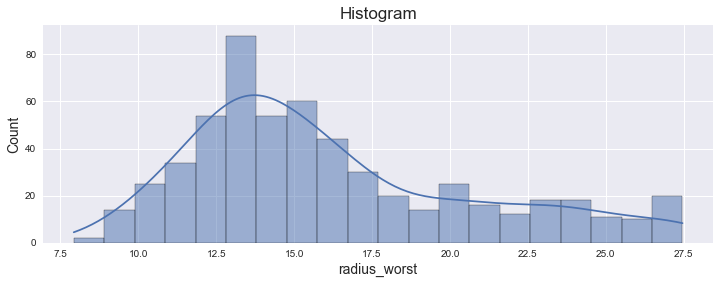

**22. Plot for texture_worst**

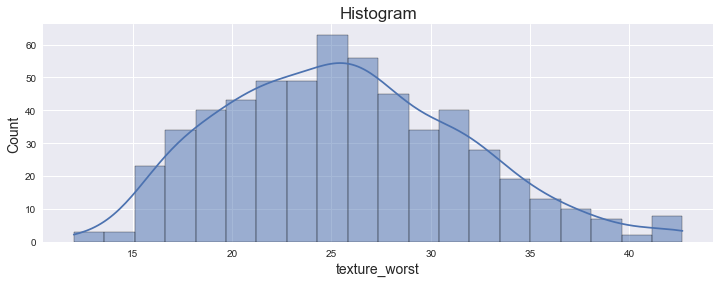

**23. Plot for perimeter_worst**

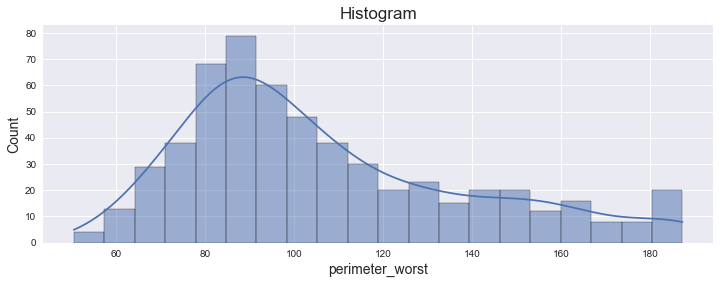

**24. Plot for area_worst**

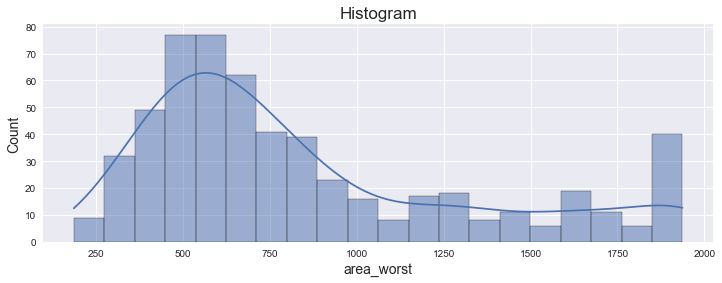

**25. Plot for smoothness_worst**

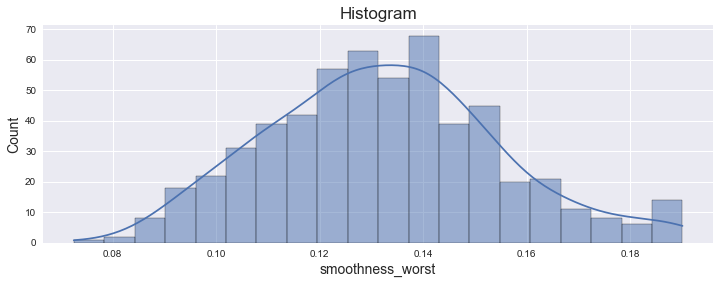

**26. Plot for compactness_worst**

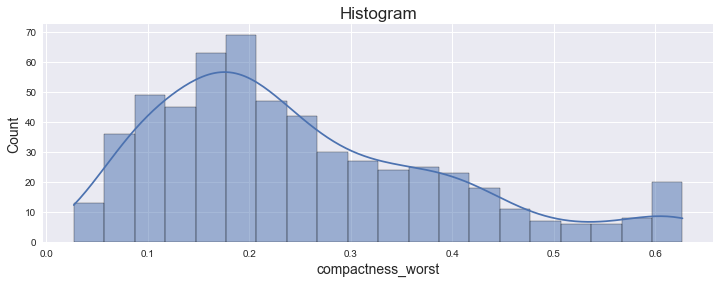

**27. Plot for concavity_worst**

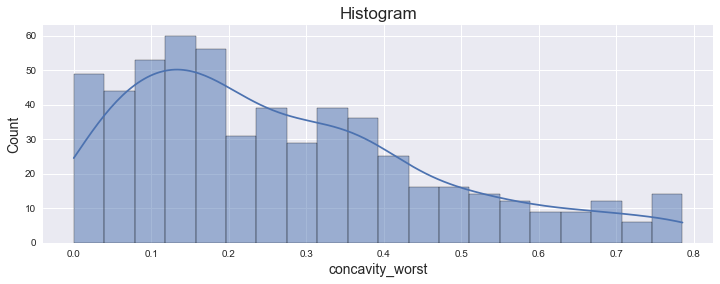

**28. Plot for concave points_worst**

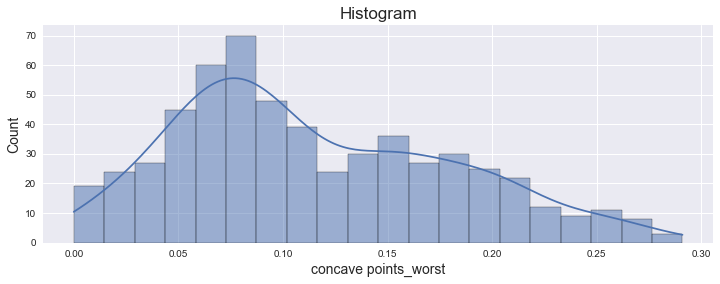

**29. Plot for symmetry_worst**

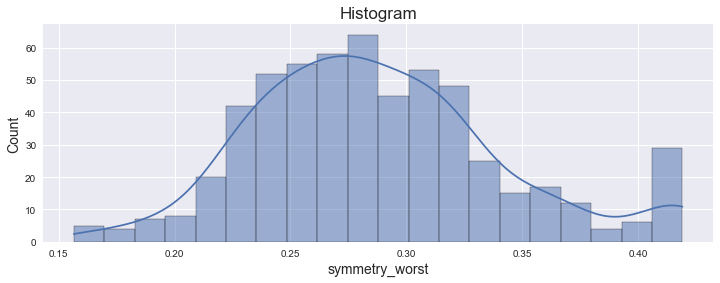

**30. Plot for fractal_dimension_worst**

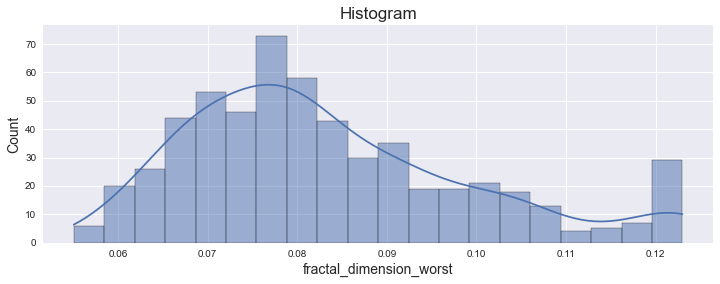

In [31]:
data_visualizer.plot_distributions(clean_df, df.columns.to_list()[2:])

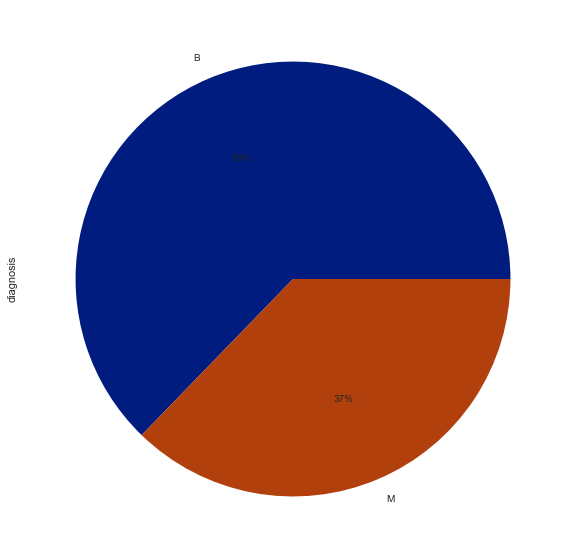

In [44]:
data_visualizer.plot_pie_chart(clean_df, "diagnosis")

# Bivariate Non-graphical Analysis

In [32]:
data_visualizer.display_correlation_matrix(clean_df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,-0.319056,...,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,-0.065946,...,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,-0.266586,...,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,-0.303524,...,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,0.586706,...,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675
compactness_mean,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,0.557003,...,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,0.325513,...,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,0.170028,...,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,0.471760,...,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494
fractal_dimension_mean,-0.319056,-0.065946,-0.266586,-0.303524,0.586706,0.557003,0.325513,0.170028,0.471760,1.000000,...,-0.252727,-0.037384,-0.202961,-0.235192,0.505984,0.456164,0.335359,0.178397,0.323400,0.776915


# Bivariate Graphical Analysis

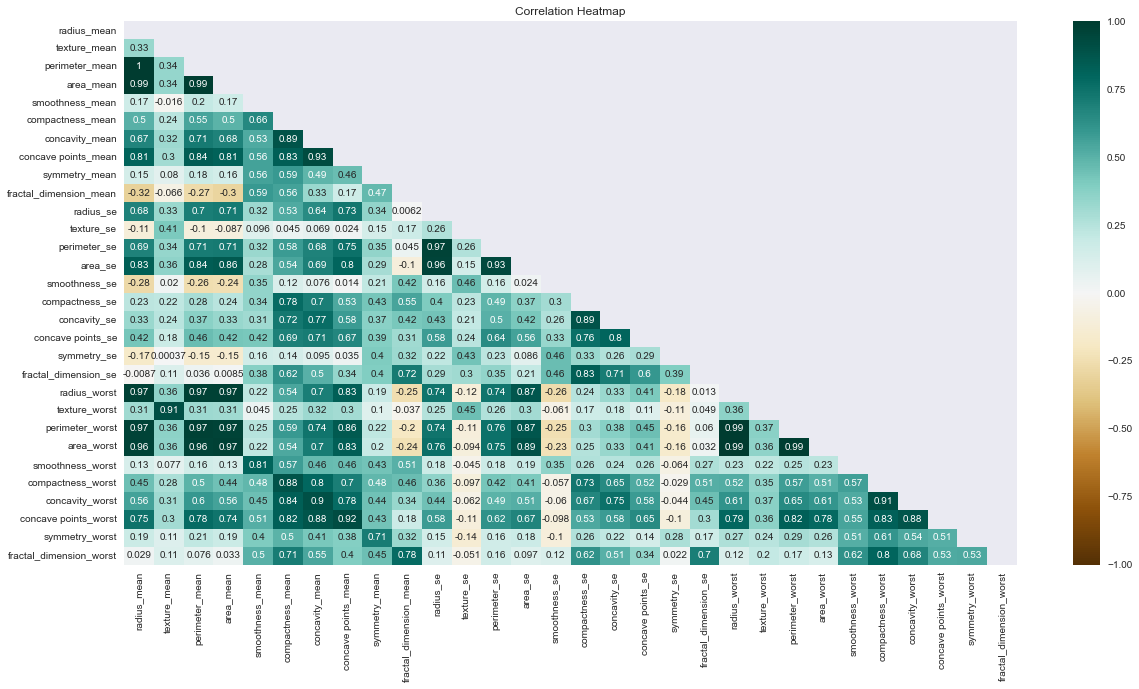

In [33]:
data_visualizer.plot_correlations(clean_df)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
standard_scaler = StandardScaler()

In [65]:
X = clean_df.iloc[:, 2:]
y = clean_df["diagnosis"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [67]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [68]:
logreg_clf = LogisticRegression()

In [69]:
logreg_clf.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = logreg_clf.predict(X_test)

In [71]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9824561403508771